# Import Data

In [1]:
import yfinance as yf
import pandas as pd

tickers = ['PG', '^GSPC']
start_date = '2007-01-01'

pf_data = pd.DataFrame()

for t in tickers:      
    pf_data[t] = yf.download(t, start=start_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
pf_data

,PG,^GSPC
Date,,
2007-01-03,38.616402,1416.599976
2007-01-04,38.323219,1418.339966
2007-01-05,37.994133,1409.709961
2007-01-08,38.077877,1412.839966
2007-01-09,37.982166,1412.109985
...,...,...
2024-12-24,168.940002,6040.040039
2024-12-26,170.160004,6037.589844
2024-12-27,169.529999,5970.839844


In [3]:
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4530 entries, 2007-01-03 to 2024-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      4530 non-null   float64
 1   ^GSPC   4530 non-null   float64
dtypes: float64(2)
memory usage: 106.2 KB


# Normalisation to 100

In [4]:
pf_data.iloc[0]

PG         38.616402
^GSPC    1416.599976
Name: 2007-01-03 00:00:00, dtype: float64

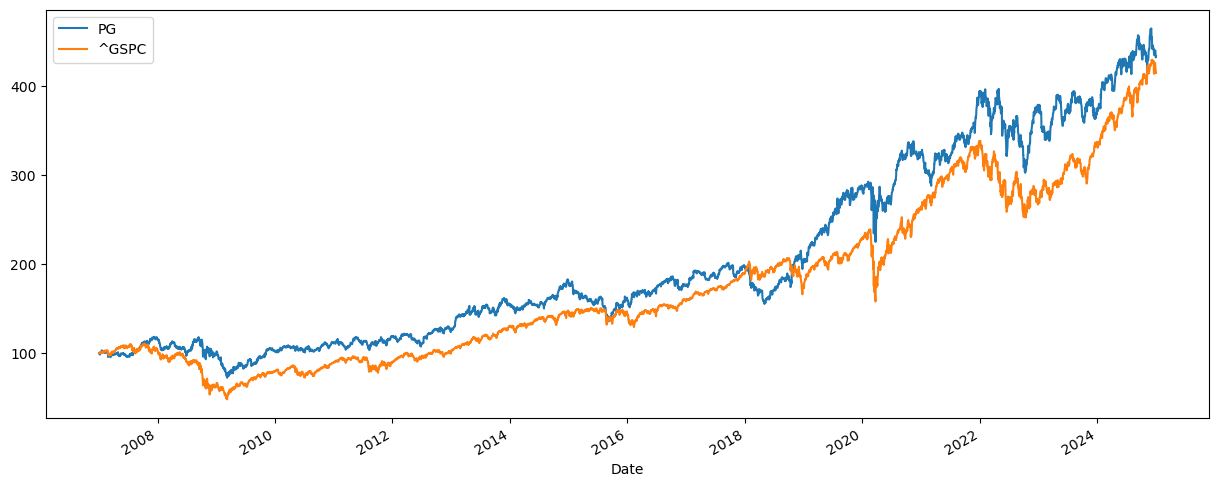

In [5]:
# .iloc
import matplotlib.pyplot as plt
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

# Calculate Log Return

In [6]:
import numpy as np

log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns

,PG,^GSPC
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.001228
2007-01-05,-0.008624,-0.006103
2007-01-08,0.002202,0.002218
2007-01-09,-0.002517,-0.000517
...,...,...
2024-12-24,0.004925,0.010982
2024-12-26,0.007196,-0.000406
2024-12-27,-0.003709,-0.011117


In [8]:
log_returns.mean() * 250

PG       0.081044
^GSPC    0.078581
dtype: float64

In [9]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.033714,0.021901
^GSPC,0.021901,0.039566


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.599658
^GSPC,0.599658,1.000000


# Optimisation

#### Weights

In [11]:
num_assets = len(tickers)
num_assets

2

In [12]:
import numpy as np

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.51256702, 0.48743298])

In [13]:
np.sum(weights)

1.0

#### Expected Portfolio Return

In [14]:
np.sum(weights * log_returns.mean()) * 250

0.07984370974504164

#### Expected Portfolio Variance

In [15]:
np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))

0.02920179072187327

#### Expected Portfolio Standard Deviation

In [16]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.17088531452957936

# Create Loop

#### Lists

In [17]:
pfolio_returns = []
pfolio_std = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_std.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_std

([0.07975048879293098,
  0.08039261810289781,
  0.07942683602208857,
  0.07998879138221715,
  0.07898851680817641,
  0.07982363648937292,
  0.08089483880475837,
  0.07933005312669218,
  0.08002224453082996,
  0.07911672454915178,
  0.08062788000789416,
  0.08005857540105402,
  0.0786175732027272,
  0.07963930262789602,
  0.07982158008656236,
  0.0810389741730195,
  0.0796186827695668,
  0.0796759432648639,
  0.07964354313524338,
  0.0796571342516962,
  0.08027625207551833,
  0.07930085628567127,
  0.07869016146576313,
  0.079065538370865,
  0.07968374471067866,
  0.07970514953225351,
  0.07983540318113032,
  0.07984285821512738,
  0.07955364082756843,
  0.07961585161659698,
  0.08049973670709318,
  0.07964818617485234,
  0.07932768428004516,
  0.08048030291463687,
  0.0798445779249921,
  0.0789219278496117,
  0.07884918330329209,
  0.07999977788526991,
  0.07871063930429935,
  0.07963766114286458,
  0.08022295350767858,
  0.07929169298673099,
  0.0793959071633649,
  0.0797284724091528,

In [18]:
len(pfolio_returns), len(pfolio_std)

(1000, 1000)

#### Arrays

In [19]:
pfolio_returns = []
pfolio_std = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_std.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_std = np.array(pfolio_std)
    
pfolio_returns, pfolio_std

(array([0.07999354, 0.07965866, 0.0802615 , 0.07906683, 0.07959003,
        0.07861303, 0.07990173, 0.07859213, 0.07967152, 0.08082452,
        0.08012841, 0.08018186, 0.07926419, 0.07993356, 0.08007139,
        0.08067463, 0.08008442, 0.08005878, 0.08005832, 0.07974737,
        0.08021255, 0.07895637, 0.07993995, 0.07887887, 0.08025247,
        0.07901598, 0.07982484, 0.07959051, 0.08099686, 0.07978428,
        0.07934049, 0.08034655, 0.07974769, 0.07952838, 0.08022217,
        0.07998371, 0.07995987, 0.08059154, 0.0809725 , 0.08083479,
        0.07865218, 0.07920688, 0.07966003, 0.0805017 , 0.08024007,
        0.08095745, 0.08025596, 0.08056751, 0.07911851, 0.07987362,
        0.0792846 , 0.08001494, 0.08071263, 0.07935913, 0.08039835,
        0.07967203, 0.07932145, 0.08074712, 0.07921474, 0.07880865,
        0.08074612, 0.0786811 , 0.080161  , 0.08099219, 0.08045776,
        0.08004033, 0.07922567, 0.08056932, 0.08001925, 0.07918275,
        0.08005615, 0.08095981, 0.07984742, 0.08

### Create Data Frame

In [20]:
portfolios = pd.DataFrame ({'Return': pfolio_returns, 'Std': pfolio_std})

In [21]:
portfolios

,Return,Std
0,0.079994,0.170294
1,0.079659,0.172488
2,0.080262,0.170830
3,0.079067,0.183699
4,0.079590,0.173323
...,...,...
995,0.080346,0.171417
996,0.080646,0.175113
997,0.079142,0.181785
998,0.079094,0.182989


# Create Graph

Text(0, 0.5, 'Standard Deviation')

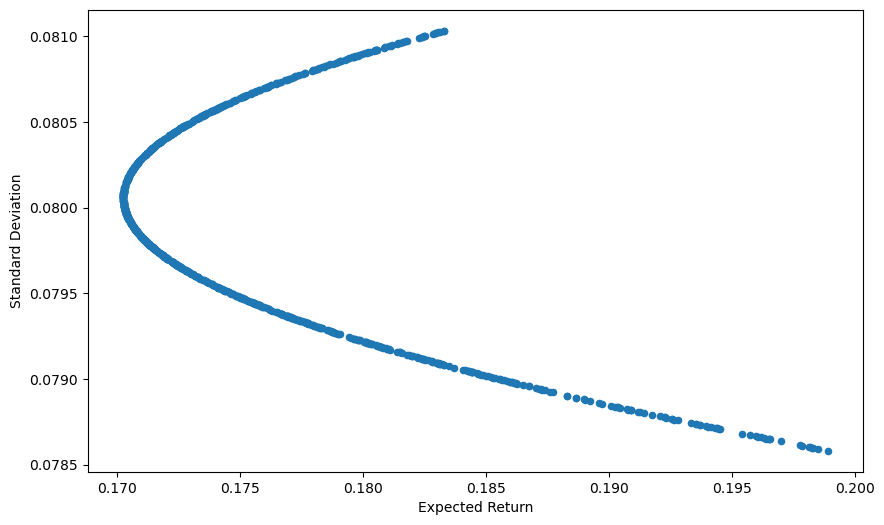

In [22]:
# Plot Shortcut with Pandas

portfolios.plot(x='Std', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Return')
plt.ylabel('Standard Deviation')

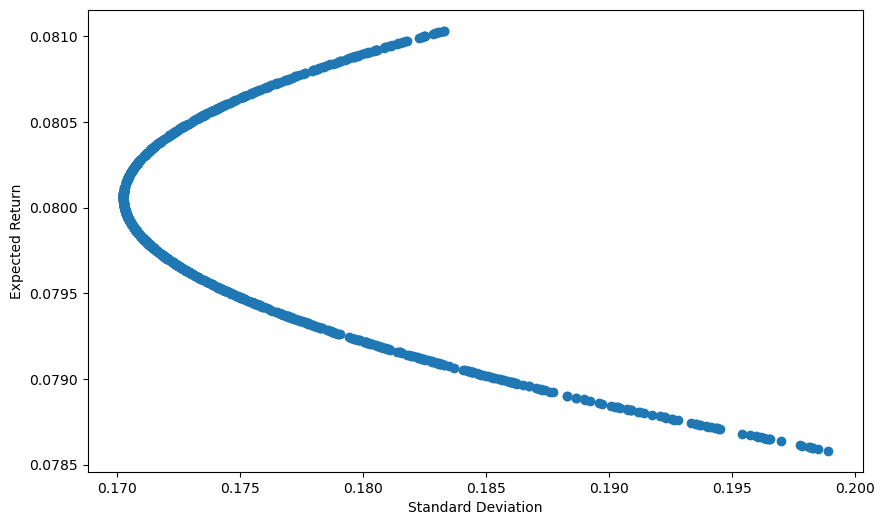

In [23]:
# Using Matplotlib Directly

plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Std'], portfolios['Return'])
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.show()